<a href="https://colab.research.google.com/github/Sheha1218/AI-Powered-Driver-Drowsiness-Detection-System/blob/main/Driver%20Drowsiness%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 1


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import cv2
import dlib

In [ ]:
od.download("https://www.kaggle.com/datasets/ismailnasri20/driver-drowsiness-dataset-ddd")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shehangunathilaka
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ismailnasri20/driver-drowsiness-dataset-ddd


100%|██████████| 2.58G/2.58G [01:58<00:00, 23.4MB/s]


In [ ]:
data_dir='/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)'

In [ ]:
BATCH_SIZE=32
IMG_SIZE=(128,128)

In [ ]:
train_data=tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=BATCH_SIZE,
                                                 image_size=IMG_SIZE,
                                                 validation_split=0.1,
                                                  subset="training",
                                                 seed=42)

test_data=tf.keras.utils.image_dataset_from_directory(data_dir,
                                                  batch_size=BATCH_SIZE,
                                                 image_size=IMG_SIZE,
                                                 validation_split=0.1,
                                                  subset="validation",
                                                 seed=42)

Found 41793 files belonging to 2 classes.
Using 37614 files for training.
Found 41793 files belonging to 2 classes.
Using 4179 files for validation.


In [ ]:
class_names=train_data.class_names
class_names

['Drowsy', 'Non Drowsy']

In [ ]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch)
  print(label_batch)

tf.Tensor(
[[[[1.31149551e+02 1.10149551e+02 8.76132812e+01]
   [1.31386719e+02 1.10226562e+02 8.81601562e+01]
   [1.31386719e+02 1.09386719e+02 8.90000000e+01]
   ...
   [1.65959274e+02 1.44959274e+02 1.19959274e+02]
   [1.65386719e+02 1.44386719e+02 1.19386719e+02]
   [1.65386719e+02 1.44386719e+02 1.19386719e+02]]

  [[1.31386719e+02 1.10386719e+02 8.63867188e+01]
   [1.32000000e+02 1.11000000e+02 8.81601562e+01]
   [1.32000000e+02 1.11000000e+02 8.90000000e+01]
   ...
   [1.66000000e+02 1.45000000e+02 1.20000000e+02]
   [1.66000000e+02 1.45000000e+02 1.20000000e+02]
   [1.66000000e+02 1.45000000e+02 1.20000000e+02]]

  [[1.32531830e+02 1.11531830e+02 8.75318298e+01]
   [1.32000000e+02 1.11000000e+02 8.81601562e+01]
   [1.31128403e+02 1.10128403e+02 8.81284027e+01]
   ...
   [1.66000000e+02 1.44066406e+02 1.17199219e+02]
   [1.66000000e+02 1.44066406e+02 1.17199219e+02]
   [1.66572556e+02 1.44638962e+02 1.17771774e+02]]

  ...

  [[2.08467087e+02 1.87467087e+02 1.58308594e+02]
   [2

In [ ]:
train_data=train_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

In [ ]:
image_batch.shape

TensorShape([32, 128, 128, 3])

In [ ]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch)
  print(label_batch)

tf.Tensor(
[[[[0.8866597  0.8896512  0.85858065]
   [0.890439   0.8932292  0.8524969 ]
   [0.88663566 0.88673633 0.8510811 ]
   ...
   [0.8977788  0.89009535 0.87058824]
   [0.89741117 0.8932467  0.8771753 ]
   [0.8980808  0.8926843  0.878473  ]]

  [[0.89108455 0.89726883 0.86437976]
   [0.8861739  0.893389   0.85213596]
   [0.8833767  0.88671196 0.8493387 ]
   ...
   [0.89537376 0.8875306  0.86814153]
   [0.89537376 0.8897692  0.8772758 ]
   [0.8949886  0.8898109  0.8767725 ]]

  [[0.8896687  0.88673633 0.8650494 ]
   [0.8854277  0.88898164 0.8647127 ]
   [0.8825961  0.87919533 0.85880625]
   ...
   [0.9092831  0.8977788  0.8818321 ]
   [0.9062083  0.8944853  0.87897605]
   [0.9054622  0.8914522  0.87827164]]

  ...

  [[0.42781863 0.41229206 0.40036765]
   [0.43548477 0.42291498 0.40807548]
   [0.4353114  0.41964242 0.40812084]
   ...
   [0.67959213 0.6759137  0.7114682 ]
   [0.64627755 0.6454308  0.681353  ]
   [0.5601015  0.5484965  0.58771217]]

  [[0.428357   0.41432956 0.400906

In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal',input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.15),
    tf.keras.layers.RandomContrast(0.2)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model=tf.keras.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,epochs=8,validation_data=test_data)

Epoch 1/8
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 89s 67ms/step - accuracy: 0.8951 - loss: 0.2384 - val_accuracy: 0.8260 - val_loss: 0.4672
Epoch 2/8
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 135s 66ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9966 - val_loss: 0.0076
Epoch 3/8
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 85s 69ms/step - accuracy: 0.9926 - loss: 0.0253 - val_accuracy: 0.9888 - val_loss: 0.0285
Epoch 4/8
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 79s 66ms/step - accuracy: 0.9931 - loss: 0.0210 - val_accuracy: 0.9998 - val_loss: 7.4098e-04
Epoch 5/8
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 80s 68ms/step - accuracy: 0.9937 - loss: 0.0198 - val_accuracy: 0.9990 - val_loss: 0.0040
Epoch 6/8
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 78s 66ms/step - accuracy: 0.9953 - loss: 0.0185 - val_accuracy: 0.9988 - val_loss: 0.0056
Epoch 7/8
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 77s 66ms/step - accuracy: 0.9974 - loss: 0.0087 - val_accuracy: 0.9971 - val_loss: 0.0083
Epoch 8/8
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.9984 - lo

In [ ]:
import tensorflow as tf
print(len(tf.config.experimental.list_physical_devices('GPU')))

1


TypeError: Image data of dtype object cannot be converted to float

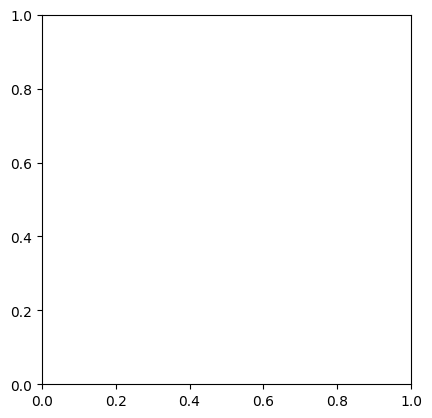

In [ ]:
resize_img=cv2.resize(img,(128,128))
scaled_img=resize_img/255

In [ ]:
y_h=model.predict(np.expand_dims(scaled_img,0))
y_h

In [ ]:
img=cv2.imread('/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy/A0001.png')
plt.imshow(img)
plt.show()

In [ ]:
resize_img=cv2.resize(img,(128,128))
scaled_img=resize_img/255

y_hat=model.predict(np.expand_dims(scaled_img,0))
y_hat

In [ ]:
img=cv2.imread('/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy/a0005.png')
plt.imshow(img)
plt.show()

In [ ]:
resize_img=cv2.resize(img,(128,128))
scaled_img=resize_img/255

y_hat=model.predict(np.expand_dims(scaled_img,0))
y_hat

In [ ]:
model.save('new_model.h5')